## Plots of vertical diffusive flux components - comparison to NO GMREDI

Diffusive tracer transport $\Phi_{Tdiff}$ from model output (Includes diffusion due to advection scheme)

| variable  | dims | units | description |
|:---------:|:---------:|:---------:|:---------:|
| DFrETr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Explicit part) |
| DFrITr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Implicit part) |

DFrE has the leaked diffusivity from GMREDI into the vertical. It is negative because it is a correction to DFrI.

DFrI is the implicit calculation of diffusivity plus the numerical diffusivity from the advetion scheme.

I divided each cell $i,j$ by its corresponding area $rA(i,j)$ to get units of flux (as in $\Phi_{diff}=\kappa_v\partial C/\partial z$)

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import xarray as xr


In [2]:
# set seaborn preferences

sns.set_context('notebook')
sns.set_style(style='white')
sns.set_palette('Set1')


In [3]:

## Set paths ##
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'

# Base case (kv=1E-5, N=5.5E-3, f=9.66E-5)
flux_file38 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'  
# Base case without GMREDI
flux_file01 = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run01/FluxTR01Glob.nc' 
# High kv without GMREDI
flux_file02 = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/FluxTR01Glob.nc'

## open datasets ##
grid = xr.open_dataset(grid_file)
flux38 = xr.open_dataset(flux_file38)
flux01 = xr.open_dataset(flux_file01)
flux02 = xr.open_dataset(flux_file02)

# Variable names
varn = {'expDF':'DFrETr01', 'impDF':'DFrITr01','advF':'ADVrTr01'}


## Vertical diffusive flux at different depths

* Changing Bu, effect of N and f (run38, run46, run52)

* Changing Kv locally and globally (run38, run01, run02, run3D07)

|Exp |Description |
|:-----:|:---------------------------------------:|
|run38 |Base case ($\kappa_v=10^{-5}$, $N=5.5\times10^{-3}$, $f=9.66\times10^{-5}$) |
|run01 |Base case without GMREDI  |
|run02 |high kv  ($10^{-3}$ $m^2s^{-1}$) |


### REDI vs NO REDI

In [21]:
def make_fig_kv(tt,zz,cmap='spectral',xslice=slice(0,360),yslice=slice(0,360)):    
    
    # Set figure and axis
    fig, ax = plt.subplots(3, 3, figsize=(16,12), sharex=True, sharey=True)

    # Find mask from open cell fractions
    Mask = np.ma.masked_equal(grid.HFacC.isel(Z=zz),0)
    
    # Select what to plot
    flux_I_38 = np.ma.masked_array(flux38.DFrITr01.isel(T=tt,Zld000090=zz,X=xslice,Y=yslice).data/ \
                                   grid.rA.isel(X=xslice,Y=yslice),
                                   mask=Mask[yslice,xslice].mask)
    
    flux_I_01 = np.ma.masked_array(flux01.DFrITr01.isel(T=tt,Zld000090=zz,X=xslice,Y=yslice).data/ \
                                   grid.rA.isel(X=xslice,Y=yslice),
                                   mask=Mask[yslice,xslice].mask)
    
    flux_I_02 = np.ma.masked_array(flux02.DFrITr01.isel(T=tt,Zld000090=zz,X=xslice,Y=yslice).data/ \
                                   grid.rA.isel(X=xslice,Y=yslice),
                                   mask=Mask[yslice,xslice].mask)

    flux_E_38 = np.ma.masked_array(flux38.DFrETr01.isel(T=tt,Zld000090=zz,X=xslice,Y=yslice).data/ \
                                   grid.rA.isel(X=xslice,Y=yslice),
                                   mask=Mask[yslice,xslice].mask)
    
    flux_E_01 = np.ma.masked_array(flux01.DFrETr01.isel(T=tt,Zld000090=zz,X=xslice,Y=yslice).data/ \
                                   grid.rA.isel(X=xslice,Y=yslice),
                                   mask=Mask[yslice,xslice].mask)
    
    flux_E_02 = np.ma.masked_array(flux02.DFrETr01.isel(T=tt,Zld000090=zz,X=xslice,Y=yslice).data/ \
                                   grid.rA.isel(X=xslice,Y=yslice),
                                   mask=Mask[yslice,xslice].mask)

    ## Define colormap limits
    cmaxI = flux_I_38.max()
    cminI = flux_I_38.min()

    cmaxE = (-flux_E_38).max()
    cminE = (-flux_E_38).min()

    cmaxT = (flux_E_38 + flux_I_38).max()
    cminT = (flux_E_38 + flux_I_38).min()

    # Plot
    cnf1 = ax[0,0].contourf(grid.X.isel(X=xslice),grid.Y.isel(Y=yslice),flux_I_38,
                            20,
                            cmap='spectral',
                            )
    cb1 = plt.colorbar(cnf1,ax=ax[0,0])
    
    cnf2 = ax[1,0].contourf(grid.X.isel(X=xslice),grid.Y.isel(Y=yslice),flux_I_01,
                            20,
                            cmap='spectral',
                            )
    cb2 = plt.colorbar(cnf2,ax=ax[1,0])
    ax[1,0].set_title('DFr Implicit, Base case NO REDI, day %1.1f, depth %1.1f' %((tt/2.0)+0.5, grid.Z[zz]))

    cnf3 = ax[2,0].contourf(grid.X.isel(X=xslice) ,grid.Y.isel(Y=yslice) ,flux_I_02,
                            20,
                            cmap='spectral',
                            )
    cb3 = plt.colorbar(cnf2,ax=ax[2,0])
    ax[2,0].set_title('DFr Implicit, Enhanced $\kappa_v$ everywhere, day %1.1f, depth %1.1f' %((tt/2.0)+0.5, grid.Z[zz]))
    
    cnf4 = ax[0,1].contourf(grid.X.isel(X=xslice) ,grid.Y.isel(Y=yslice) ,flux_E_38,
                            20,
                            cmap='spectral',
                           )
    cb4 = plt.colorbar(cnf4,ax=ax[0,1])
    ax[0,1].set_title('DFr Explict, Base Case, day %1.1f, depth %1.1f' %((tt/2.0)+0.5, grid.Z[zz]))

    cnf5 = ax[1,1].contourf(grid.X.isel(X=xslice) ,grid.Y.isel(Y=yslice) ,flux_E_01,
                            20,
                            cmap='spectral',
                           )
    cb5 = plt.colorbar(cnf5,ax=ax[1,1])
    ax[1,1].set_title('DFr Explict, Base case NO REDI, day %1.1f, depth %1.1f' %((tt/2.0)+0.5, grid.Z[zz]))

    cnf6 = ax[2,1].contourf(grid.X.isel(X=xslice) ,grid.Y.isel(Y=yslice) ,flux_E_02,
                            20,
                            cmap='spectral',
                           )
    cb6 = plt.colorbar(cnf6,ax=ax[2,1])
    ax[2,1].set_title('DFr Explict, Enhanced $\kappa_v$ everywhere, day %1.1f, depth %1.1f' %((tt/2.0)+0.5, grid.Z[zz]))
    
    cnf7 = ax[0,2].contourf(grid.X.isel(X=xslice) ,grid.Y.isel(Y=yslice) ,flux_E_38+flux_I_38,
                            20,
                            cmap='spectral',
                           )

    cb7 = plt.colorbar(cnf7,ax=ax[0,2])
    ax[0,2].set_title('DF Total, Base Case, day %1.1f, depth %1.1f' %((tt/2.0)+0.5, grid.Z[zz]))

    cnf8 = ax[1,2].contourf(grid.X.isel(X=xslice) ,grid.Y.isel(Y=yslice) ,flux_E_01+flux_I_01,
                            20,
                            cmap='spectral',
                            )
    cb8 = plt.colorbar(cnf8,ax=ax[1,2])
    ax[1,2].set_title('DF Total, Base case NO REDI, day %1.1f, depth %1.1f' %((tt/2.0)+0.5, grid.Z[zz]))

    cnf9 = ax[2,2].contourf(grid.X.isel(X=xslice) ,grid.Y.isel(Y=yslice) ,flux_E_02+flux_I_02,
                            20,
                            cmap='spectral',
                            )
    cb9 = plt.colorbar(cnf9,ax=ax[2,2])
    ax[2,2].set_title('DF Total, Enhanced $\kappa_v$ everywhere, day %1.1f, depth %1.1f' %((tt/2.0)+0.5, grid.Z[zz]))
    
    for axs in [ax[0,0],ax[1,0],ax[2,0]]:
        axs.set_ylabel('Cross-shore distance (m)')
    
    for axs in [ax[2,0],ax[2,1],ax[2,2]]:
        axs.set_xlabel('Alongshore distance (m)')
    
    for axs in [ax[0,0],ax[1,0],ax[2,0],ax[0,1],ax[1,1],ax[2,1],ax[0,2],ax[1,2],ax[2,2]]:
        axs.contour(grid.X.isel(X=xslice),grid.Y.isel(Y=yslice),grid.Depth.isel(X=xslice,Y=yslice),[152.5,1000], colors='0.4')
    
    for cbax in [cb7,cb8,cb9]:
        cbax.set_label('$[C]ms^{-1}$')
    
    plt.tight_layout()

## Shelf break depth

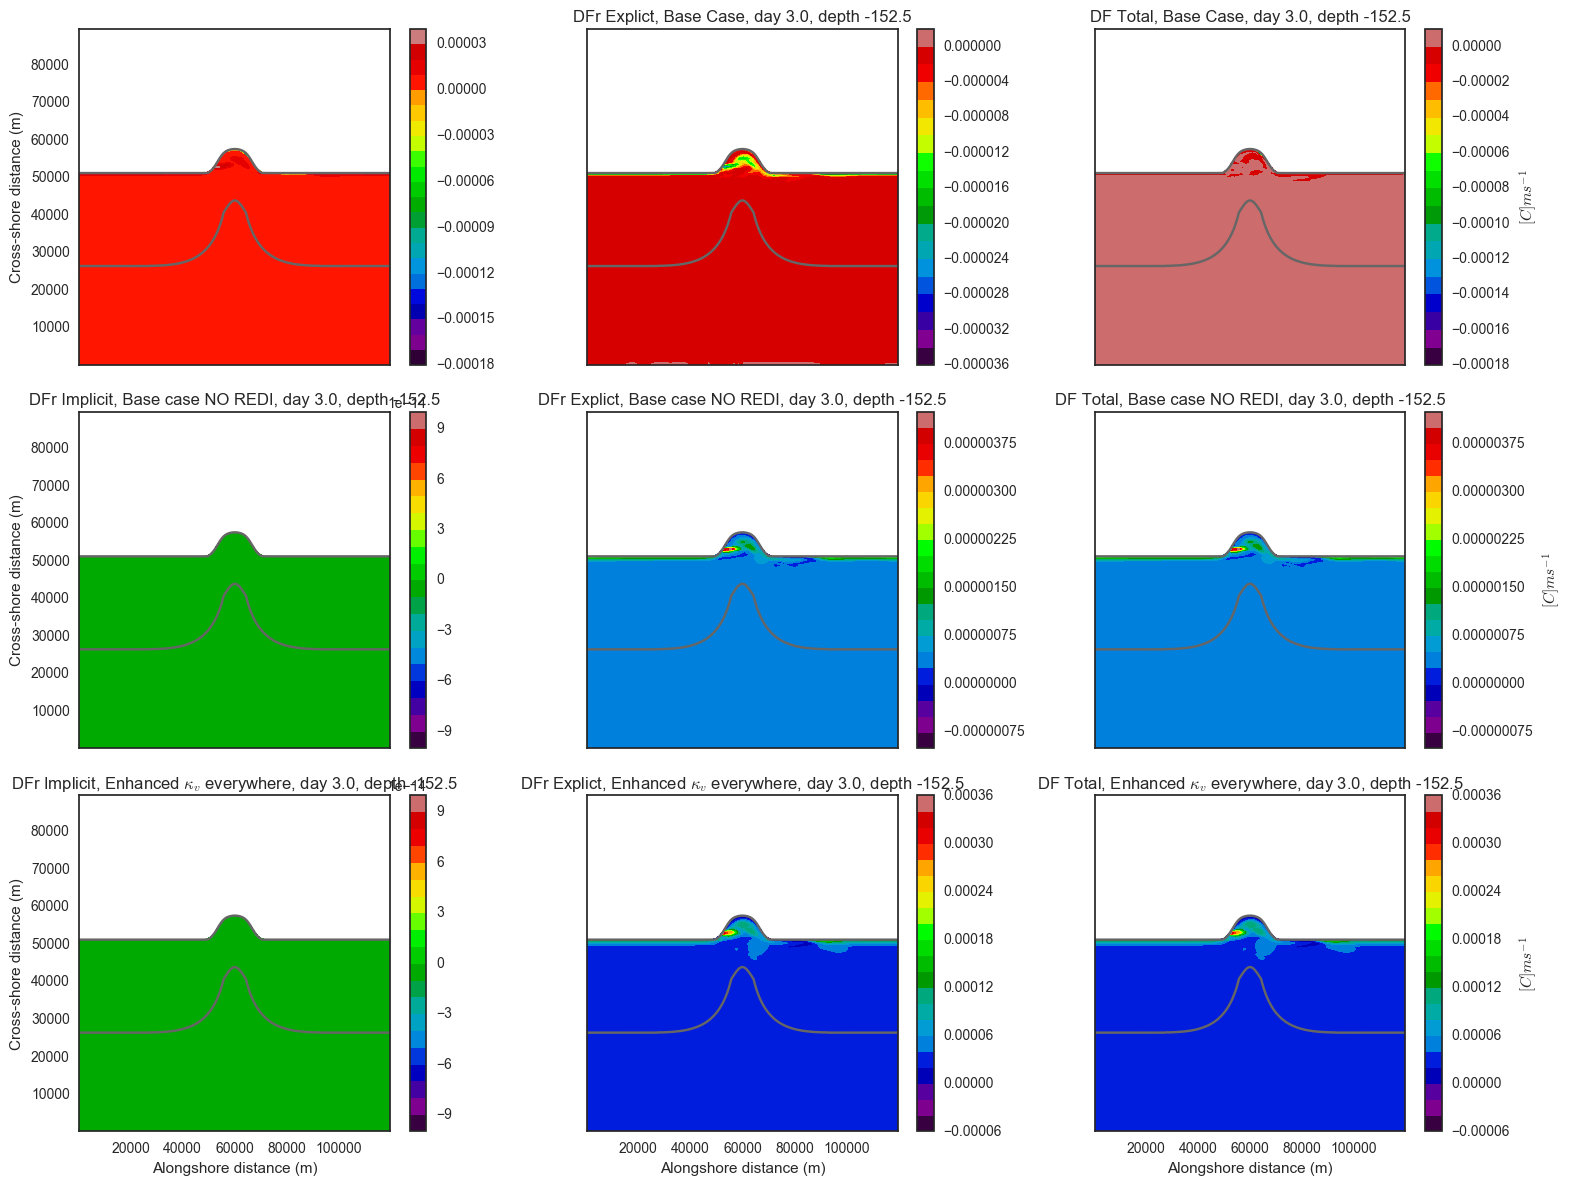

In [22]:
make_fig_kv(5,30)

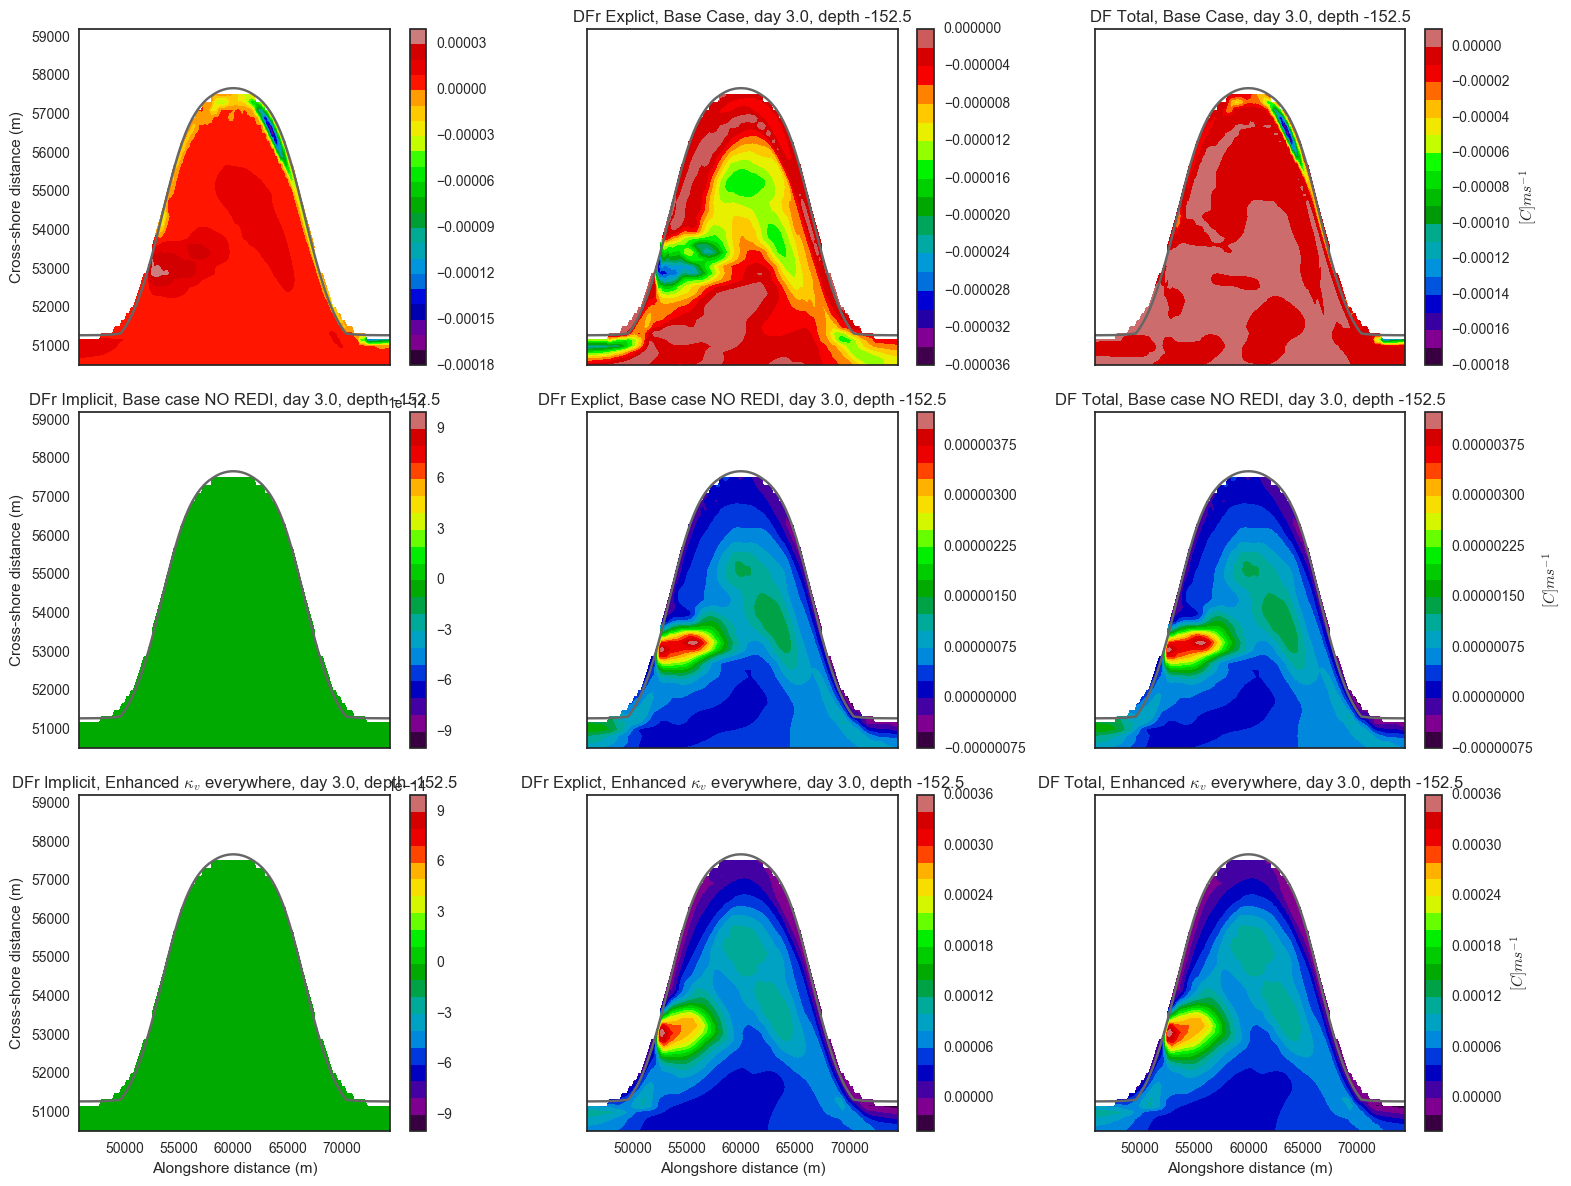

In [23]:
make_fig_kv(5,30,xslice=slice(100, 261), yslice=slice(220, 267))

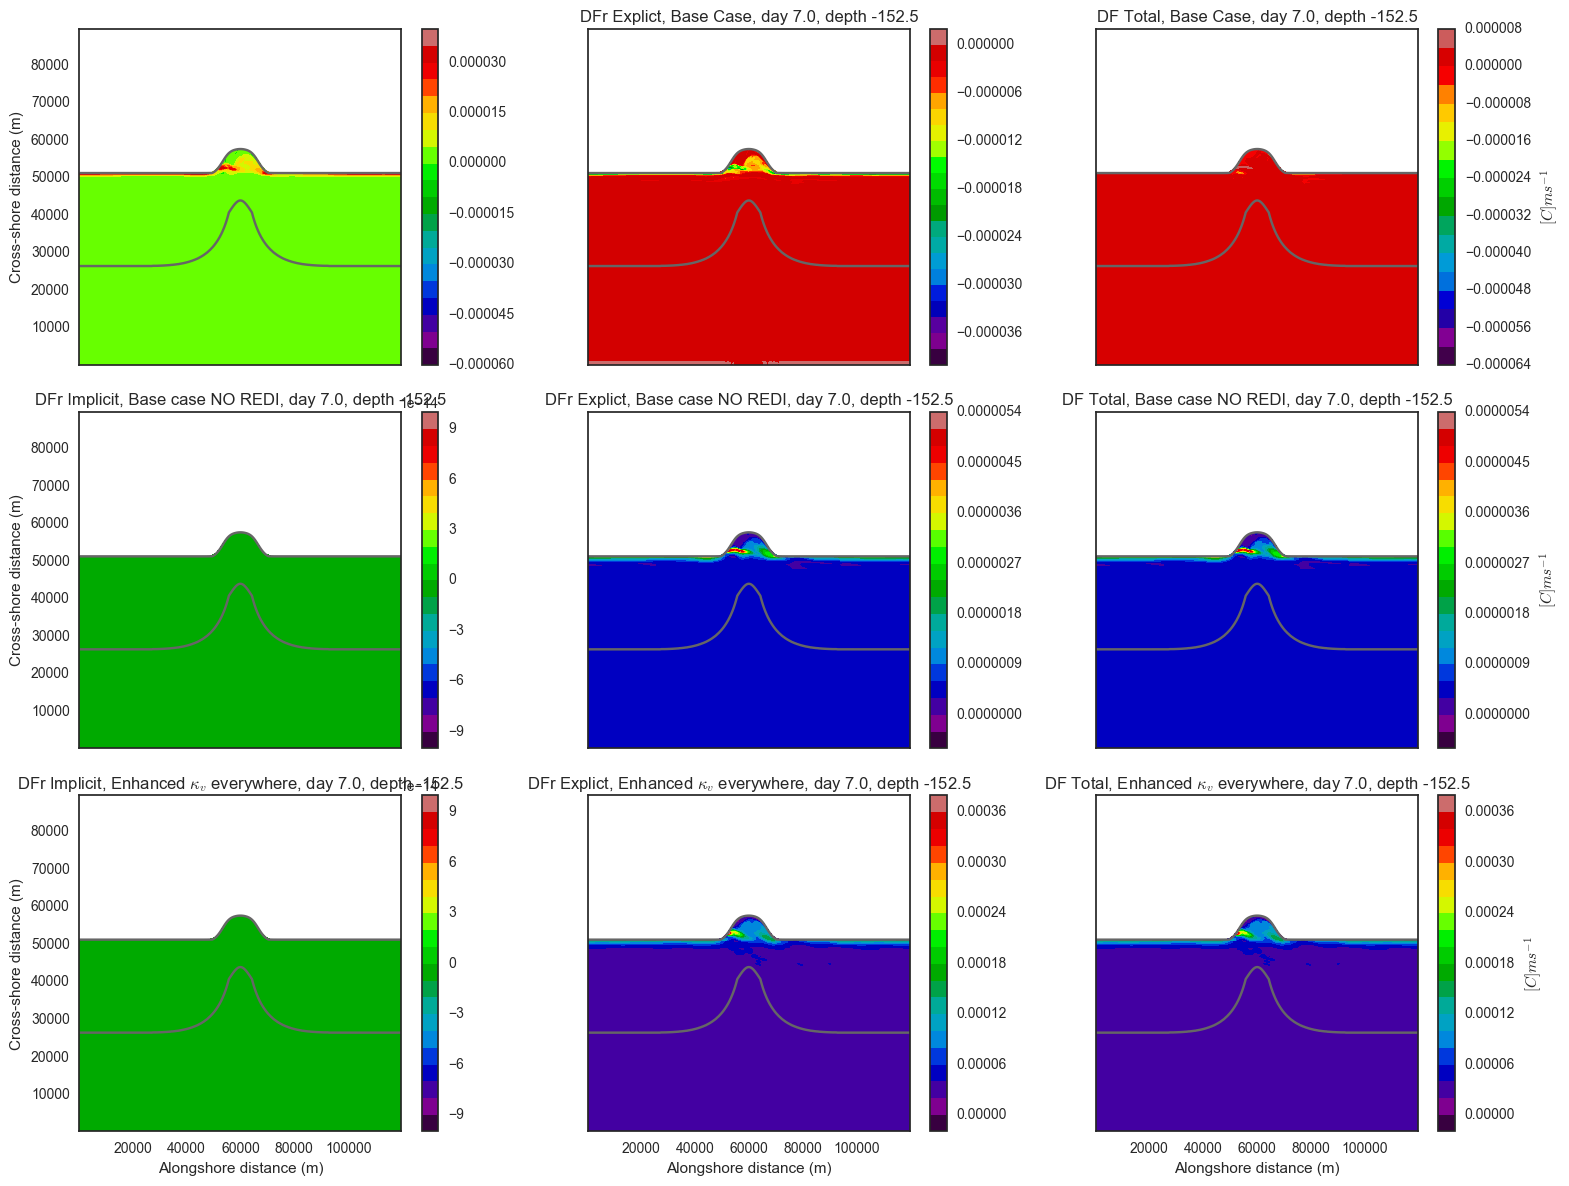

In [24]:
make_fig_kv(13,30)

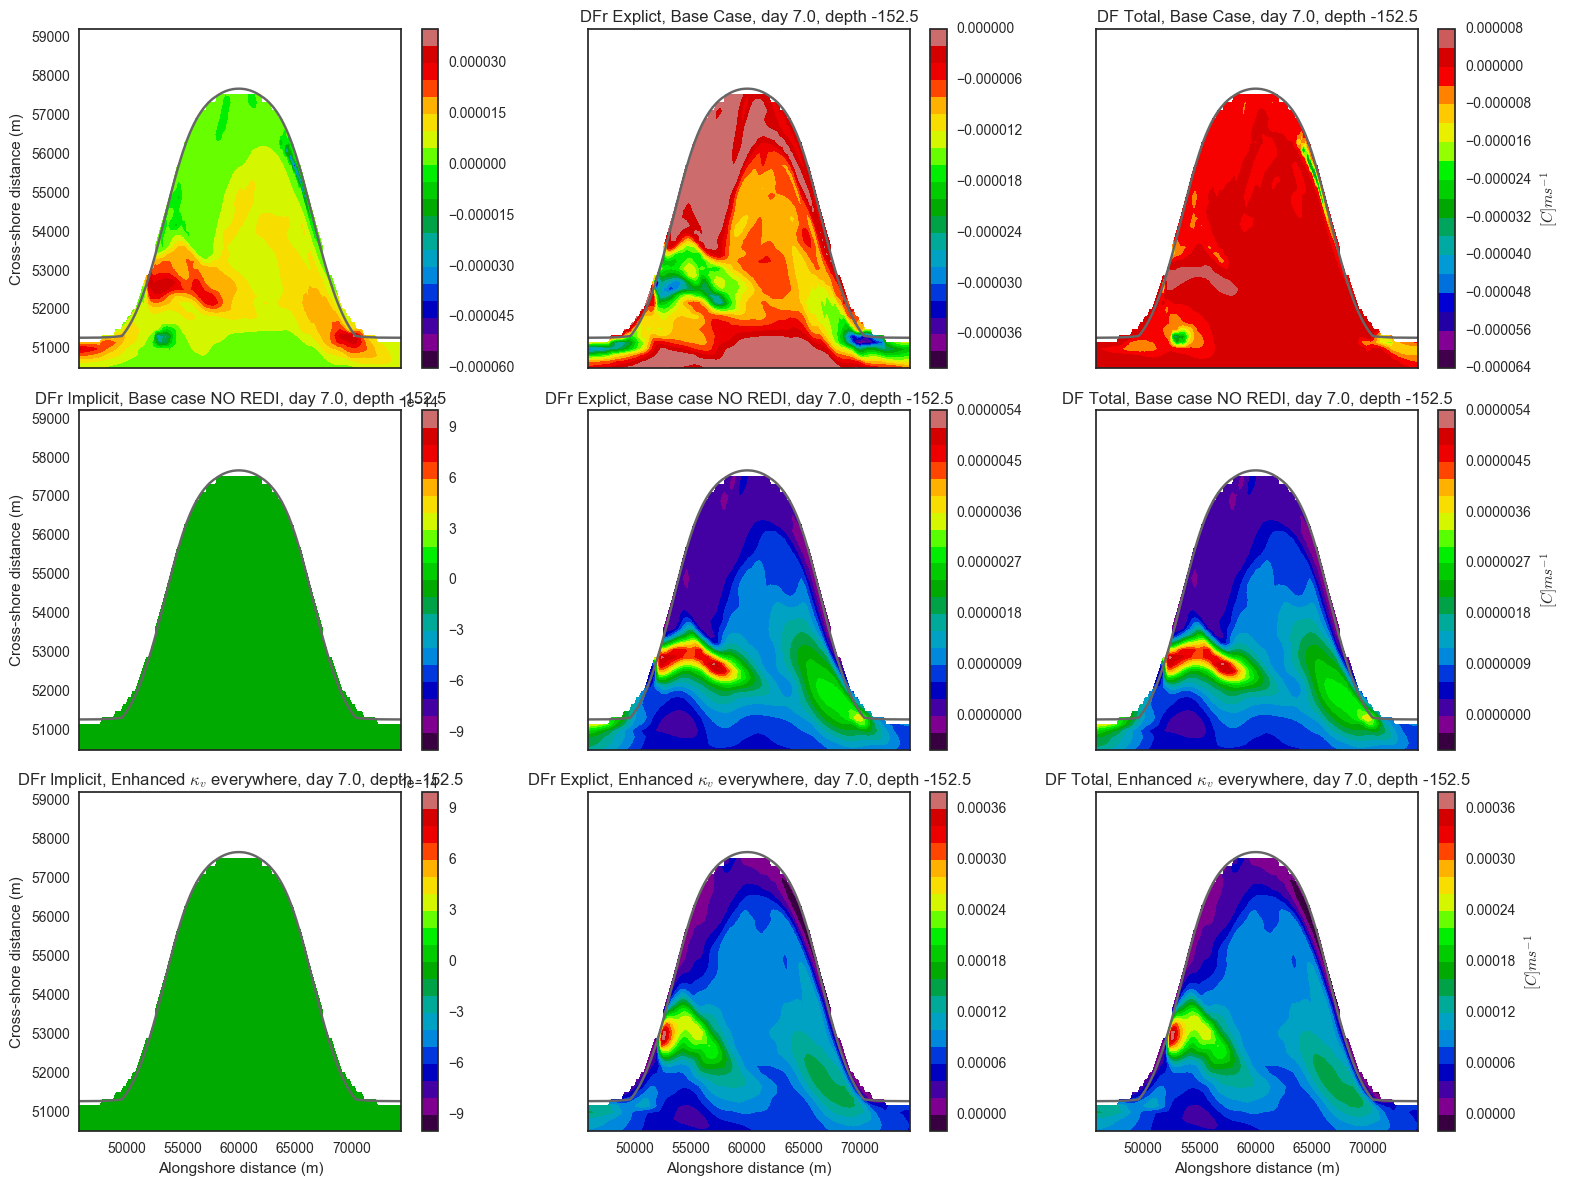

In [25]:
make_fig_kv(13,30,xslice=slice(100, 261), yslice=slice(220, 267))

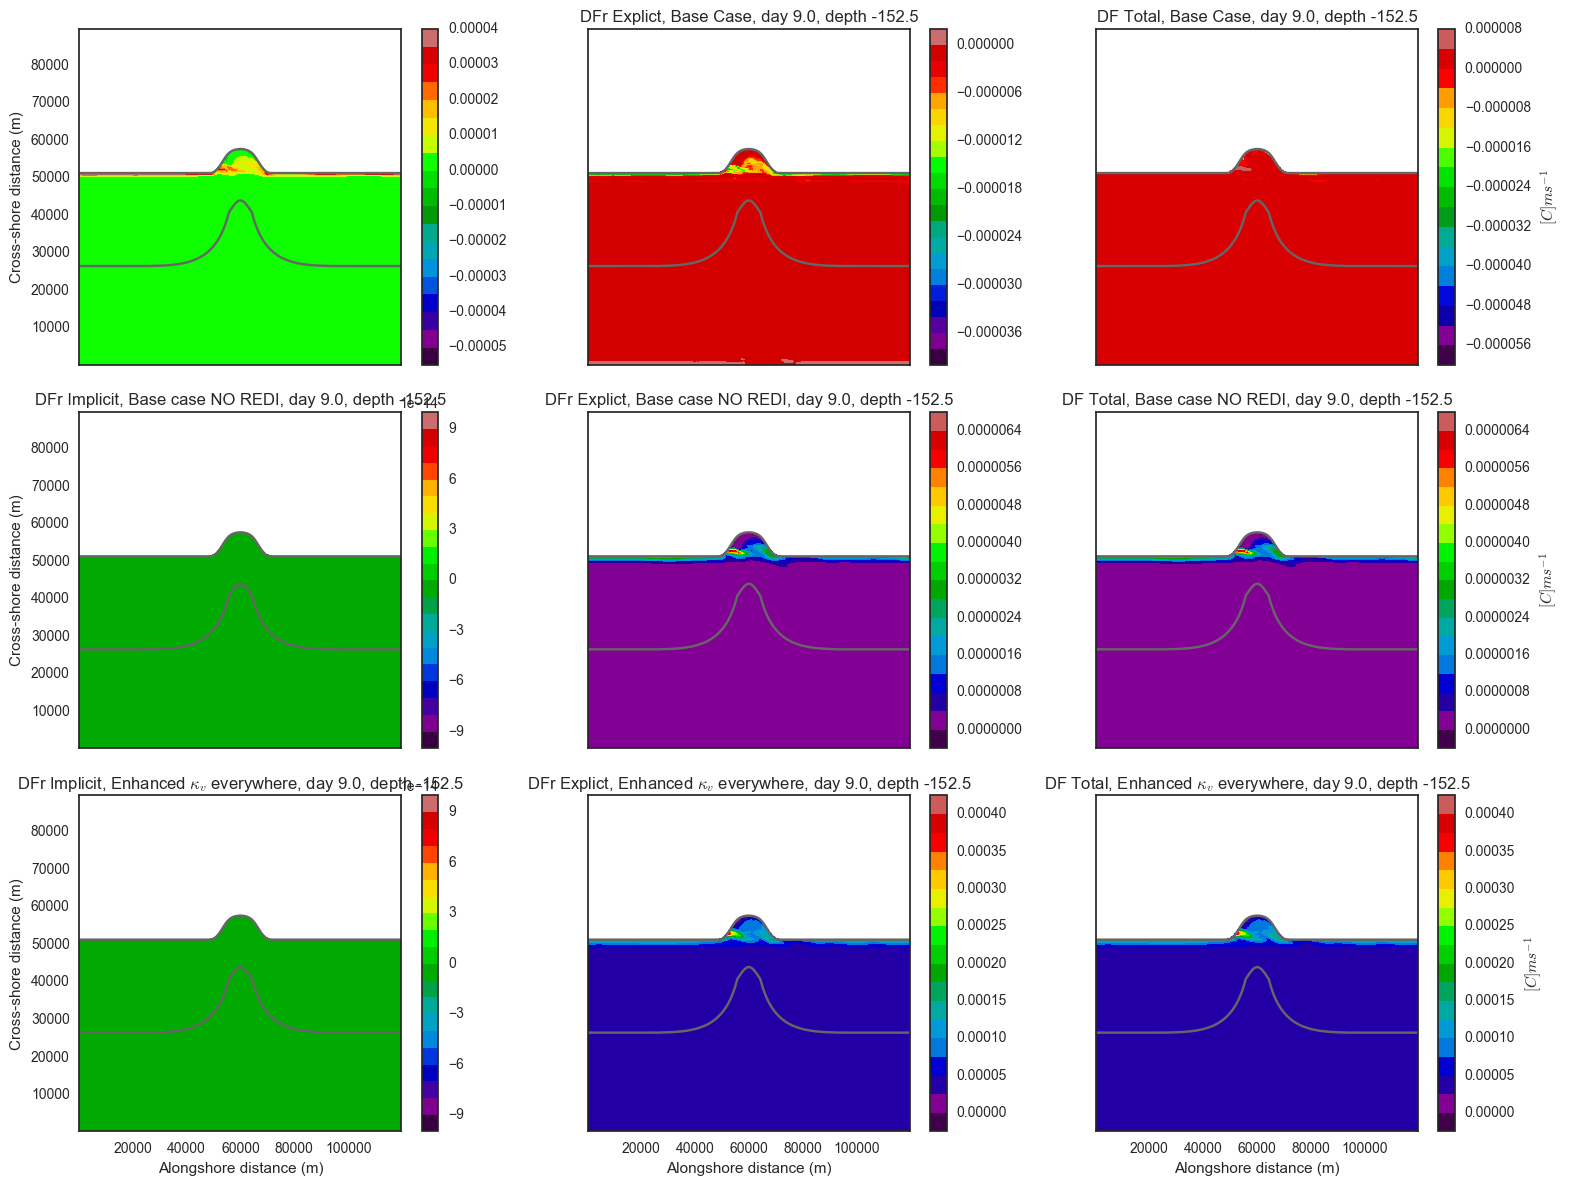

In [26]:
make_fig_kv(17,30)

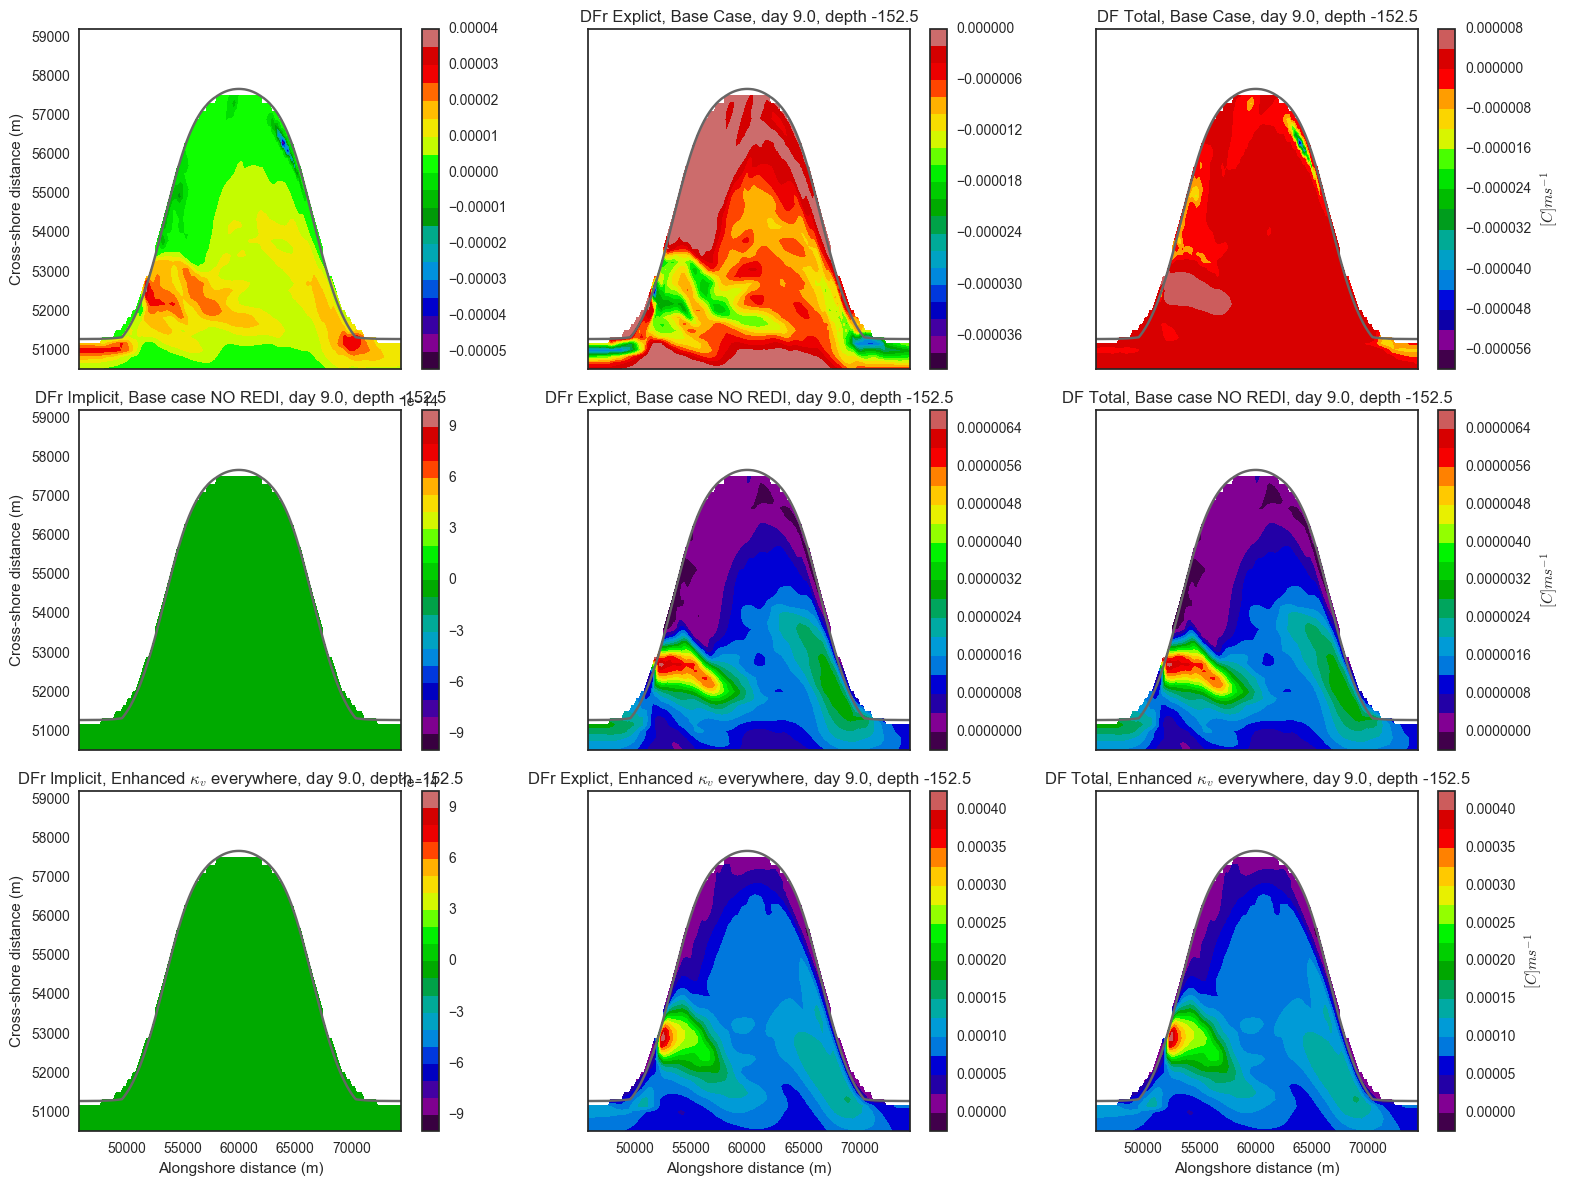

In [27]:
make_fig_kv(17,30,xslice=slice(100, 261), yslice=slice(220, 267))

## Below shelf break depth

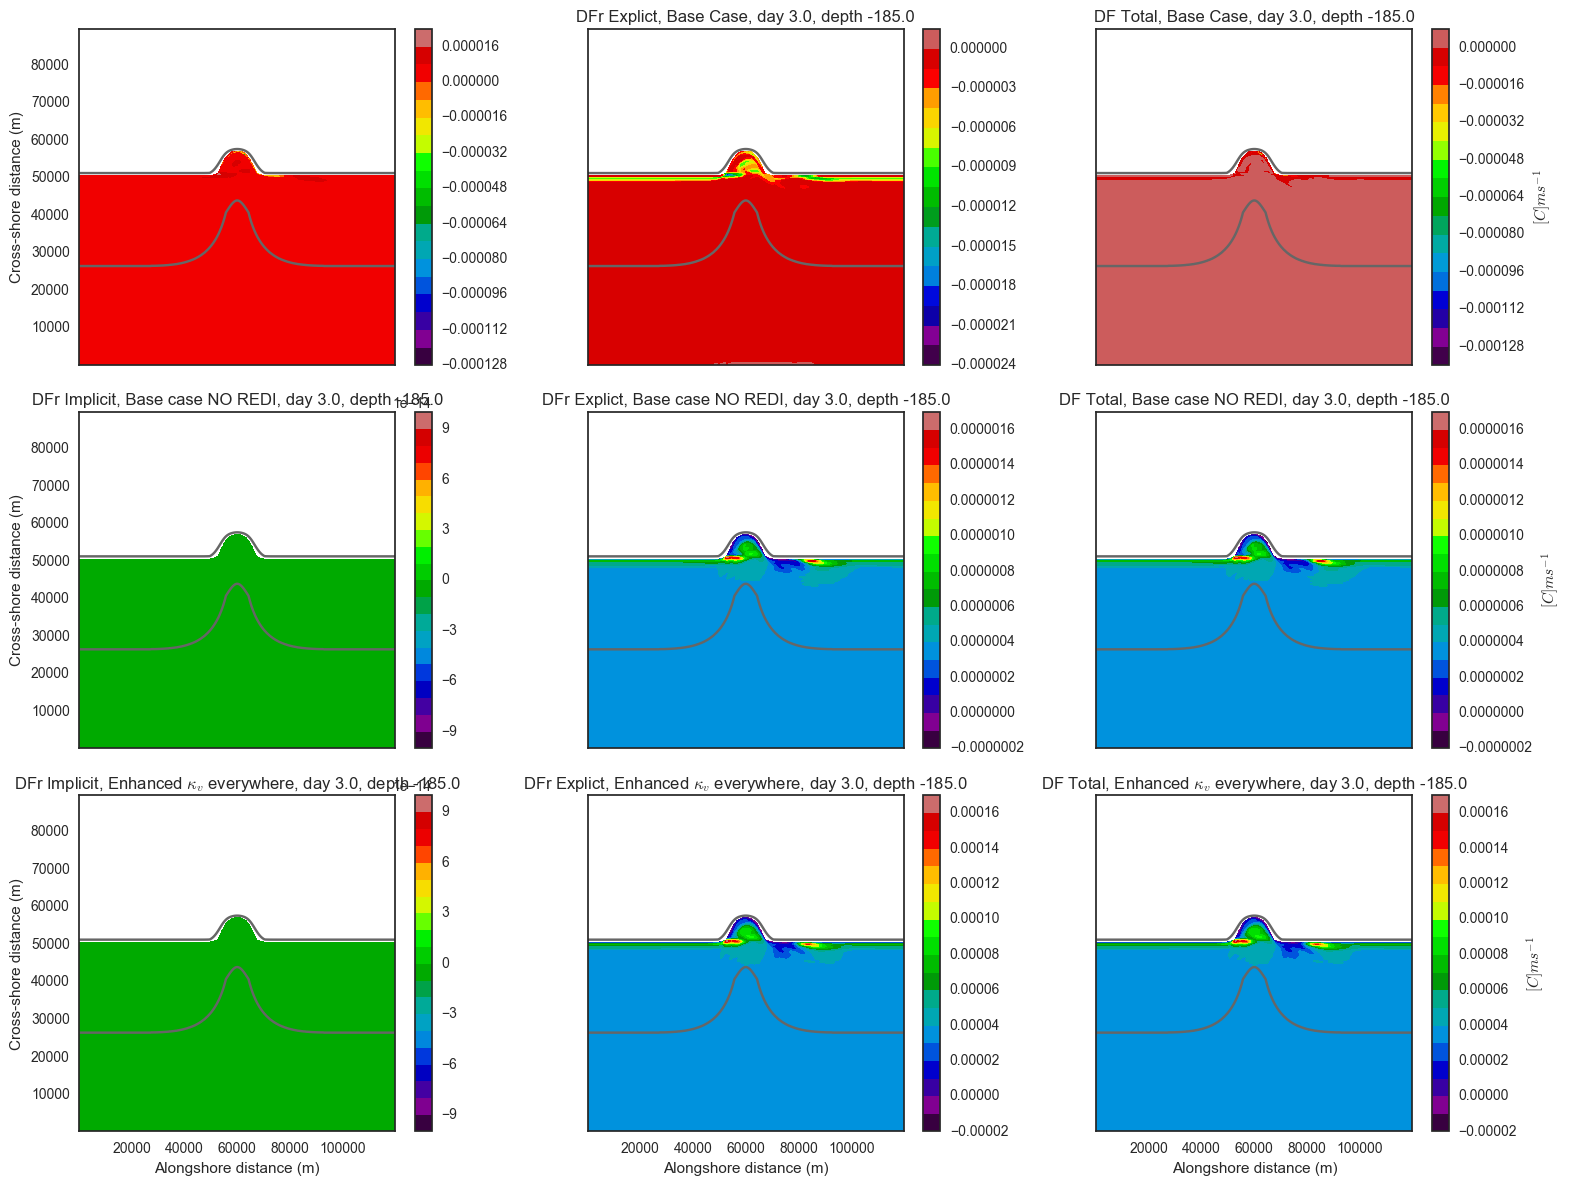

In [28]:
make_fig_kv(5,35)

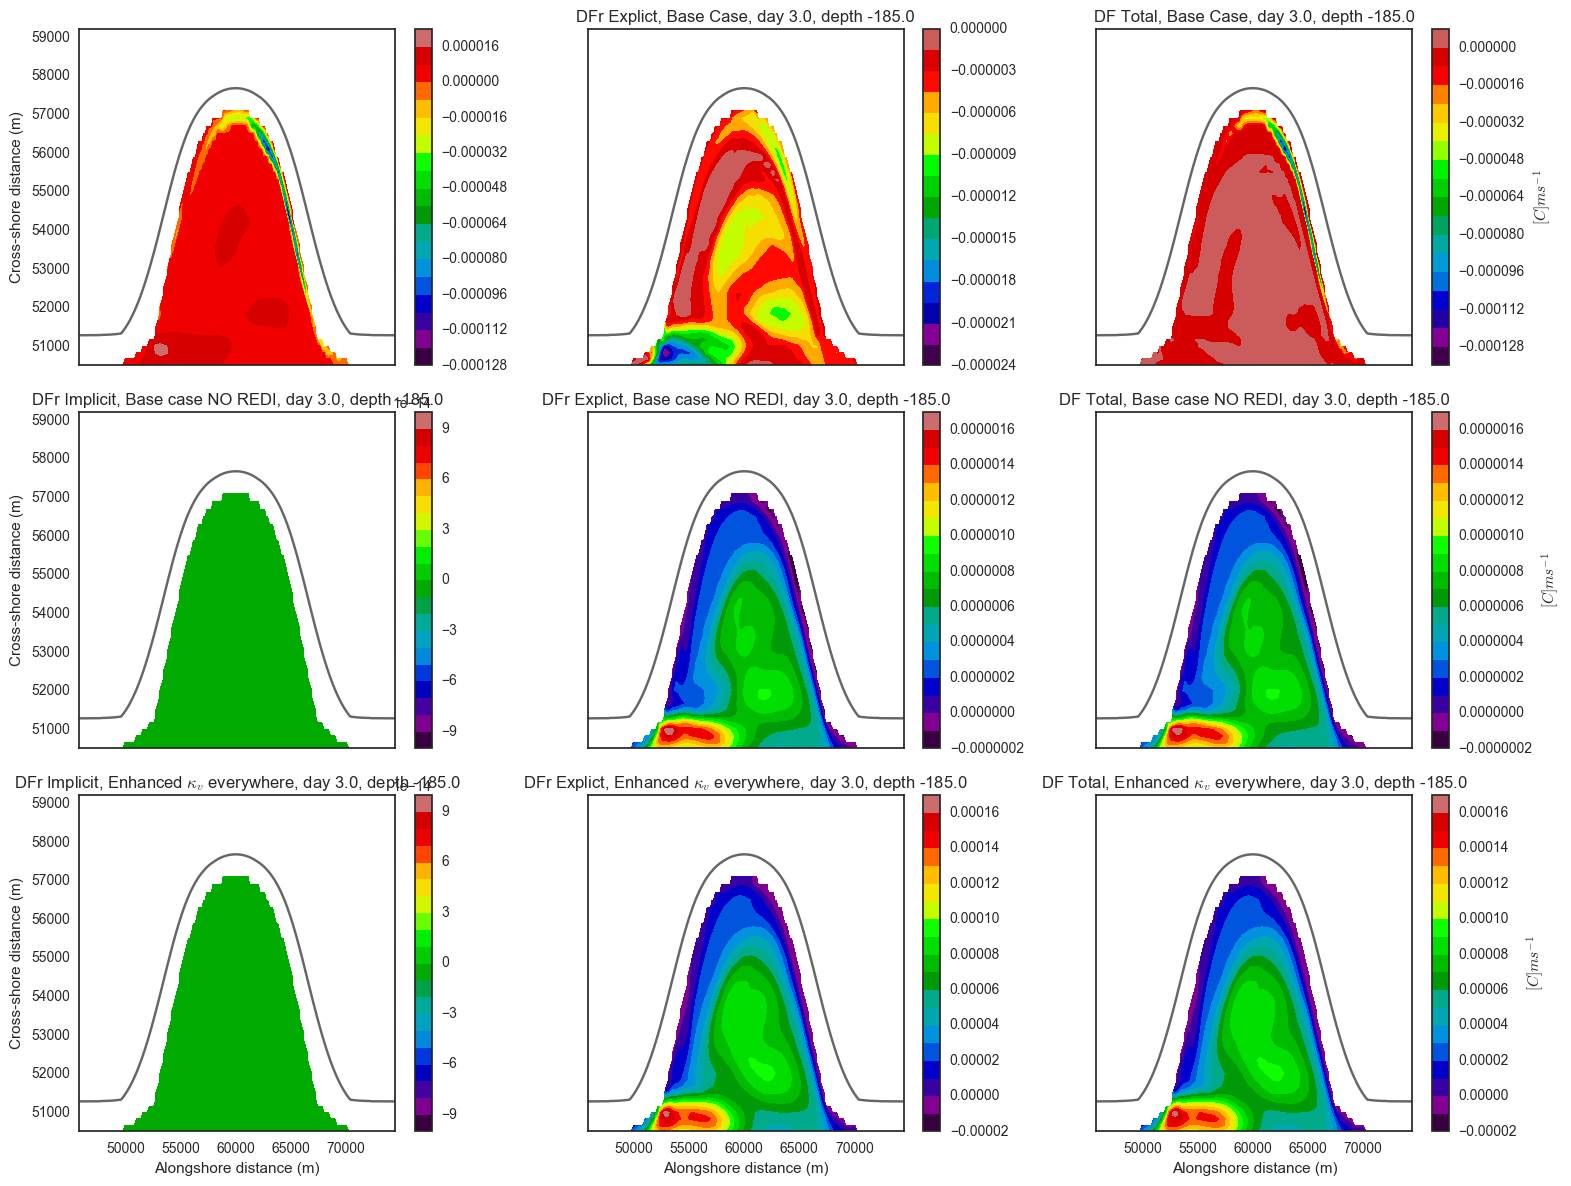

In [29]:
make_fig_kv(5,35,xslice=slice(100, 261), yslice=slice(220, 267))

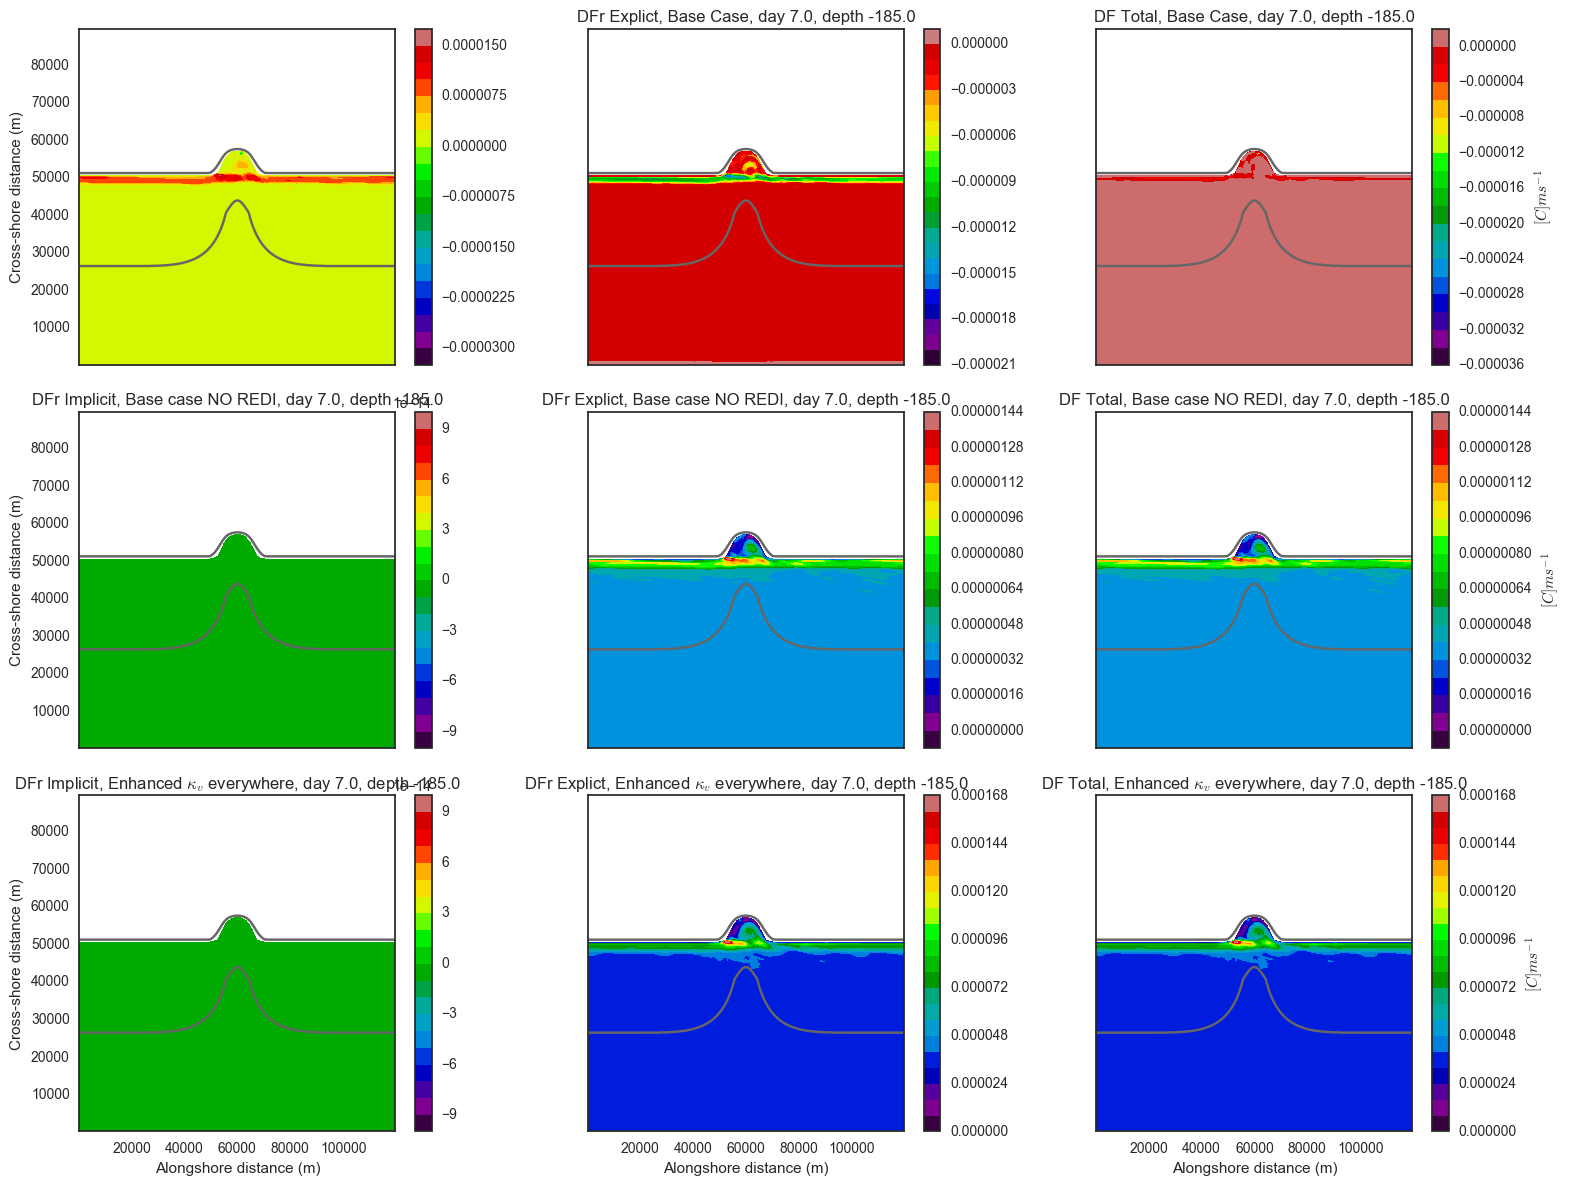

In [30]:
make_fig_kv(13,35)

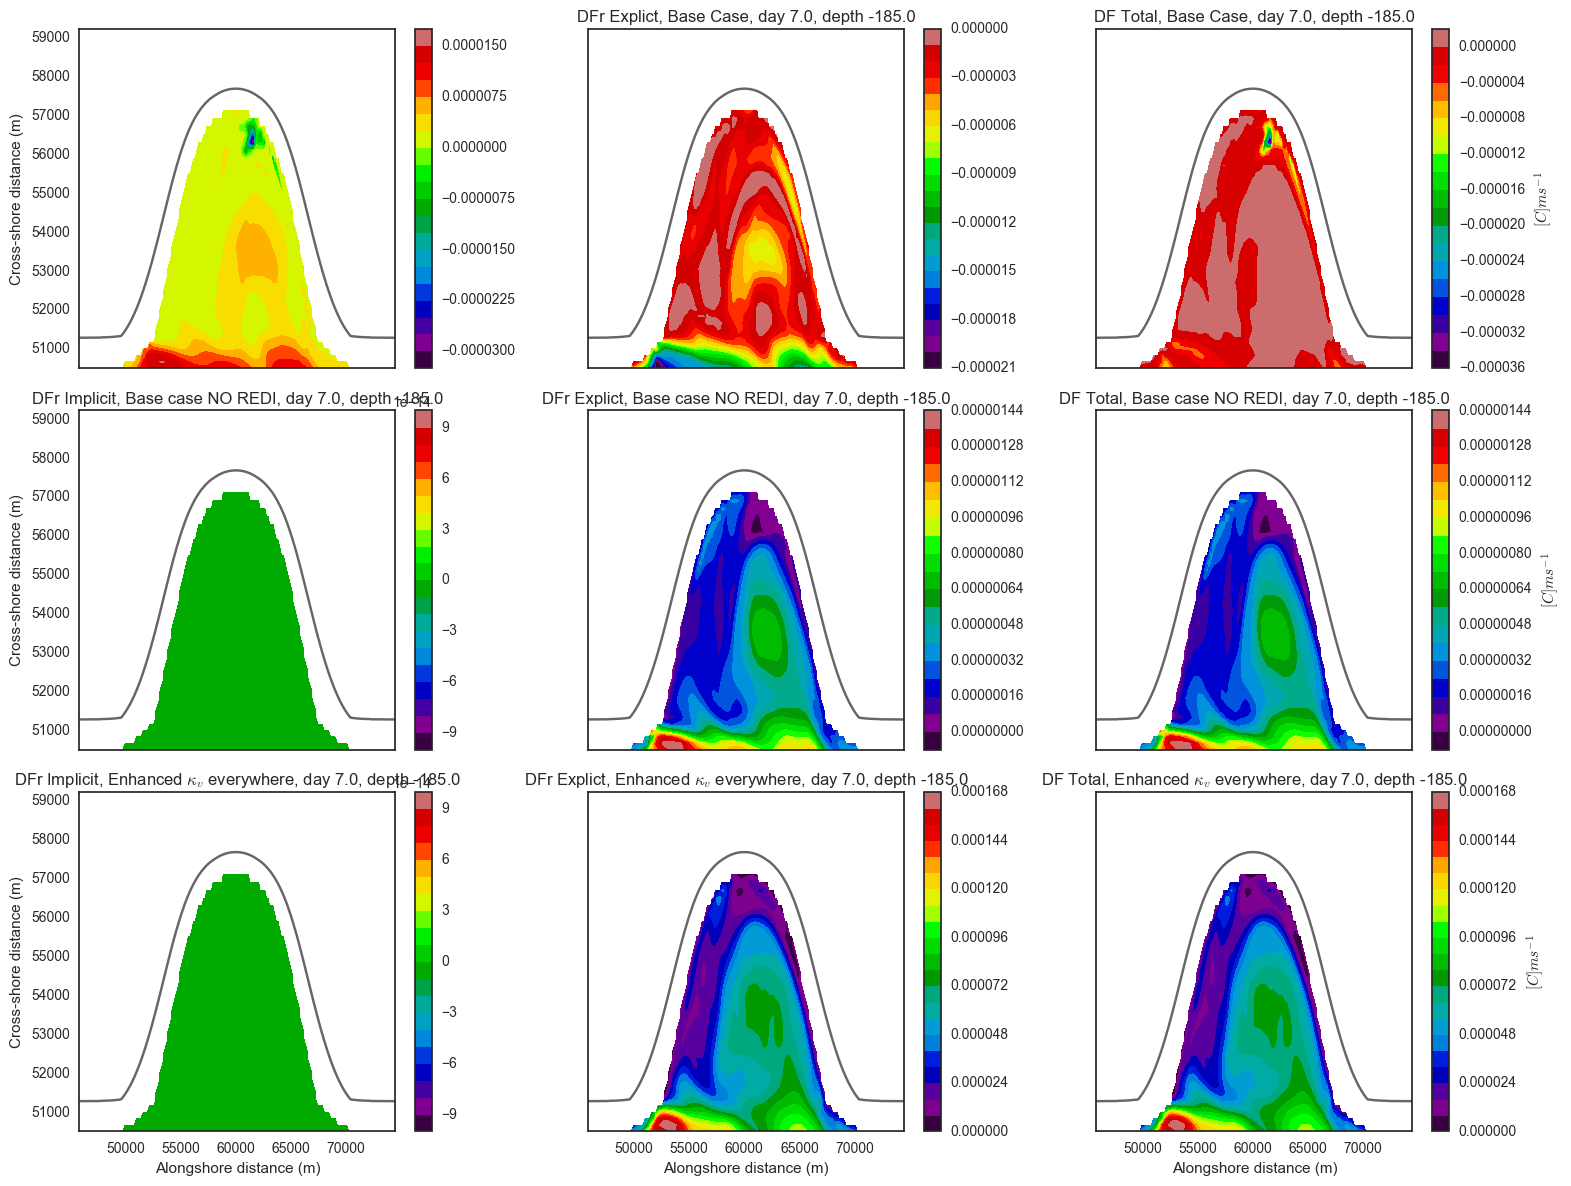

In [31]:
make_fig_kv(13,35,xslice=slice(100, 261), yslice=slice(220, 267))

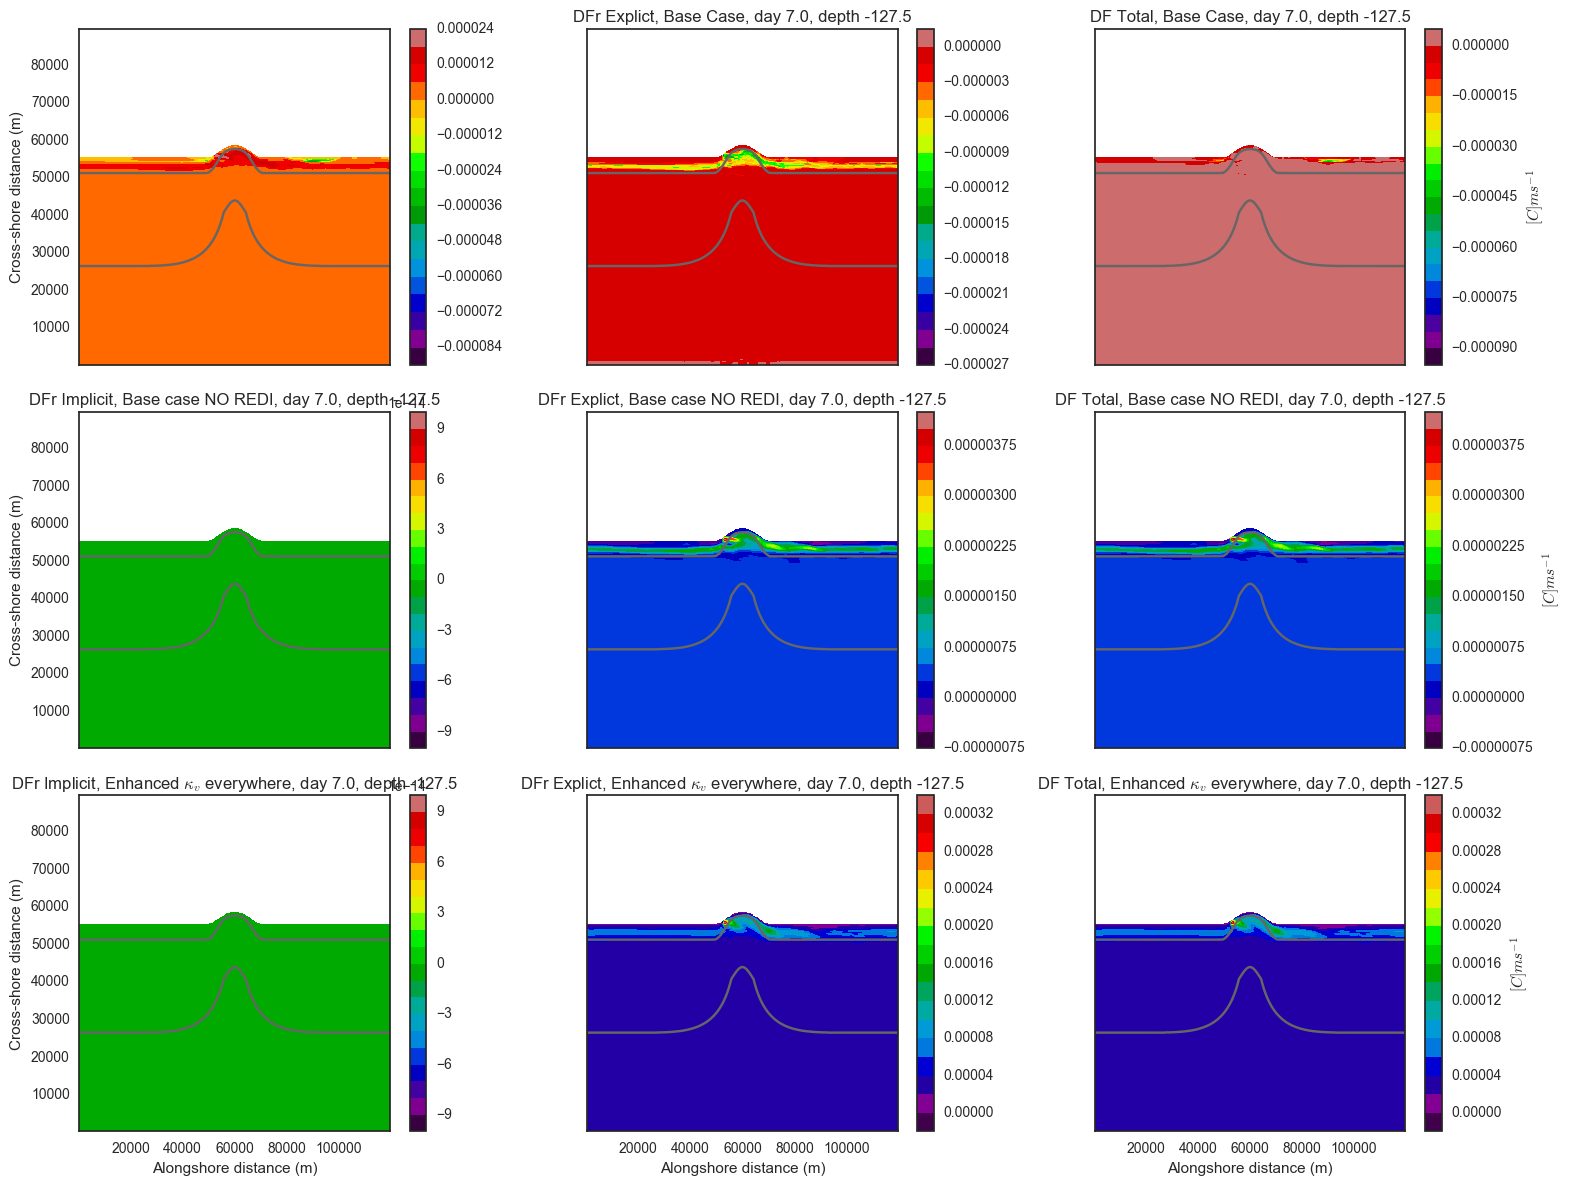

In [32]:
make_fig_kv(13,25)

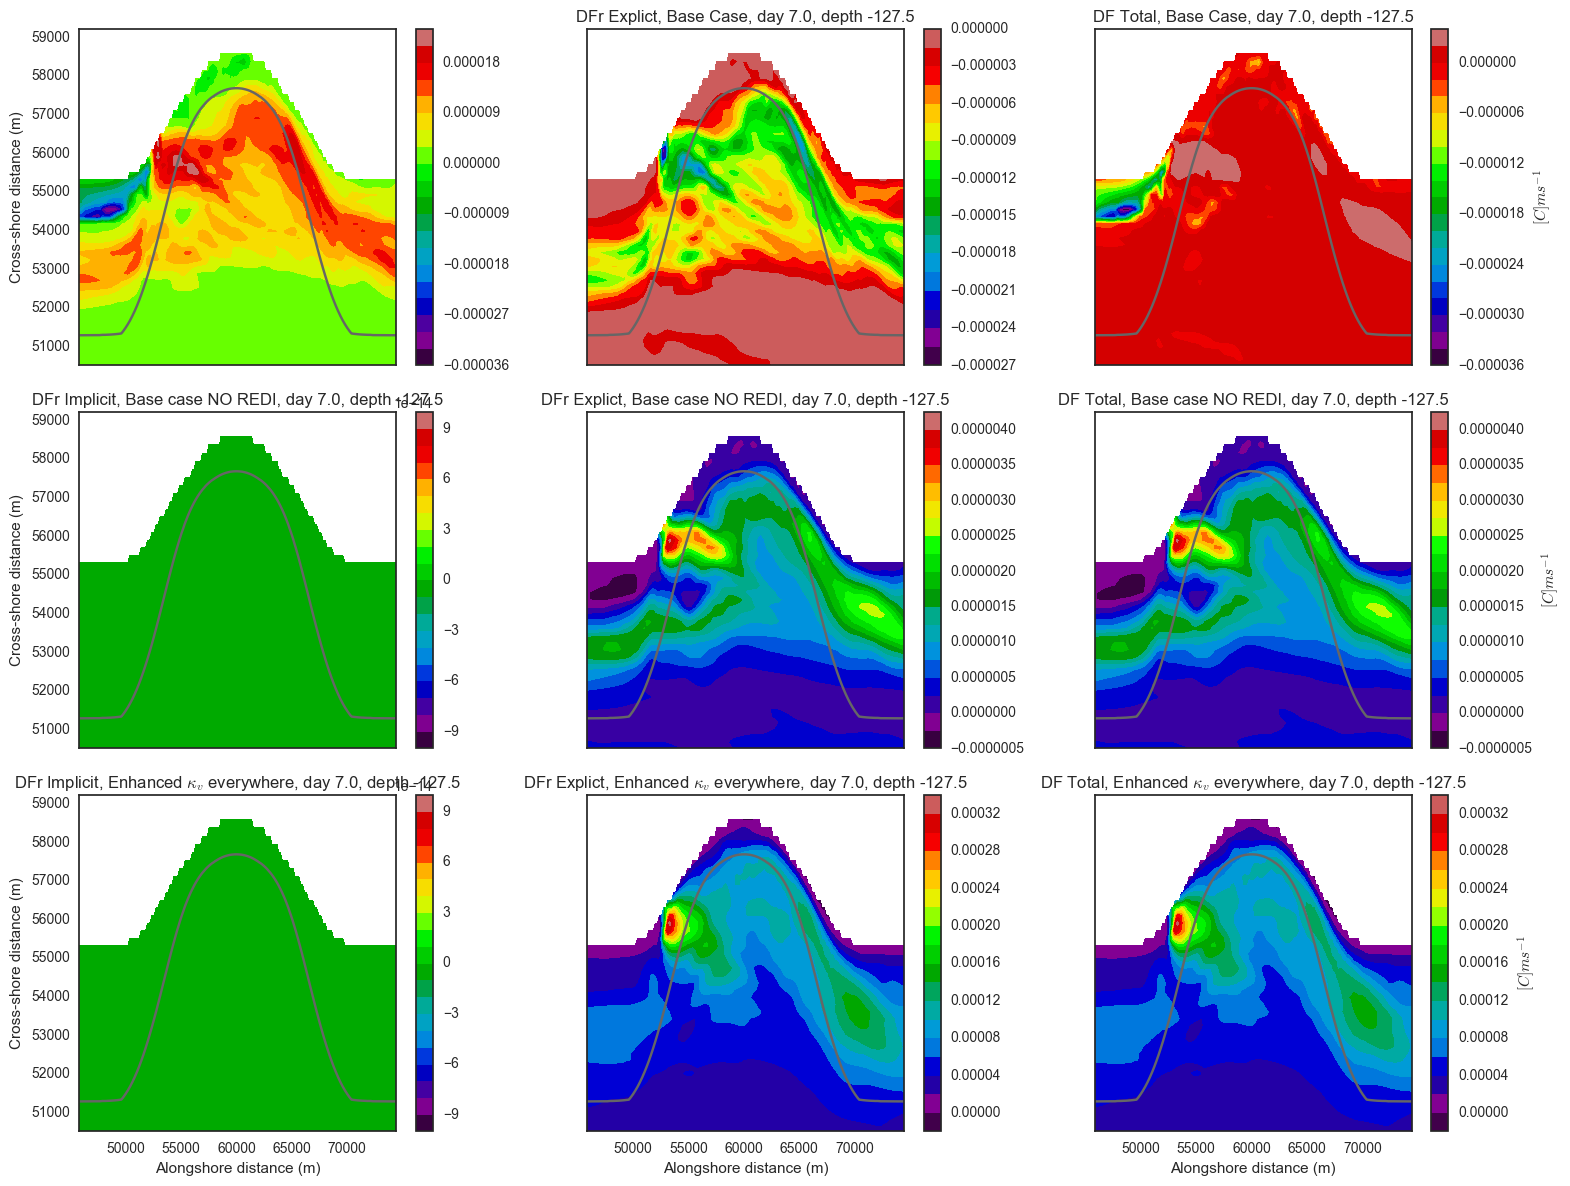

In [33]:
make_fig_kv(13,25,xslice=slice(100, 261), yslice=slice(220, 267))